In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as px

sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,7)
plt.rcParams['font.size']=13

In [59]:
data=pd.read_csv('exams.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
data.loc[data.duplicated(),:]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
825,male,group E,associate's degree,standard,completed,100,100,100


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [38]:
data.rename(columns={'race/ethnicity' : 'groups','math score':'maths','reading score':'read','writing score':'write'},inplace=True)

In [42]:
data

,gender,groups,parental level of education,lunch,test preparation course,maths,read,write
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [39]:
data.gender.value_counts()

male      516
female    483
Name: gender, dtype: int64

In [63]:
fig=go.Figure()
fig.add_trace(go.Bar(
            x=data.gender.value_counts().index,
            y=data.gender.value_counts(),
        
            textposition='outside',
))

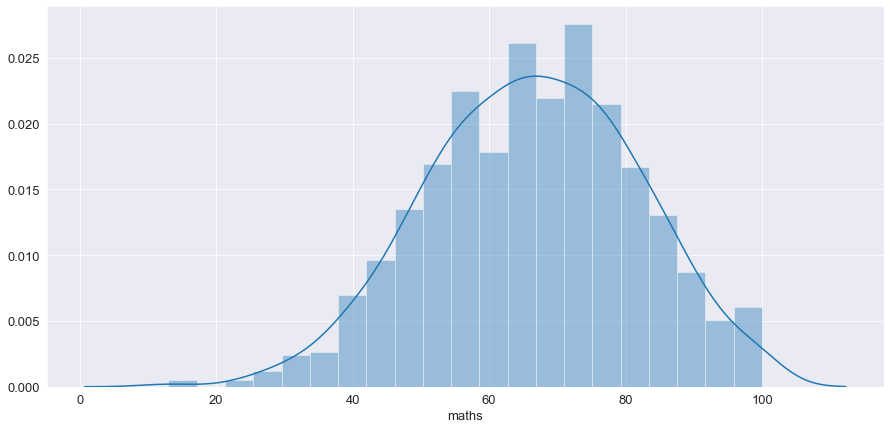

In [40]:
sns.distplot(data['maths'])

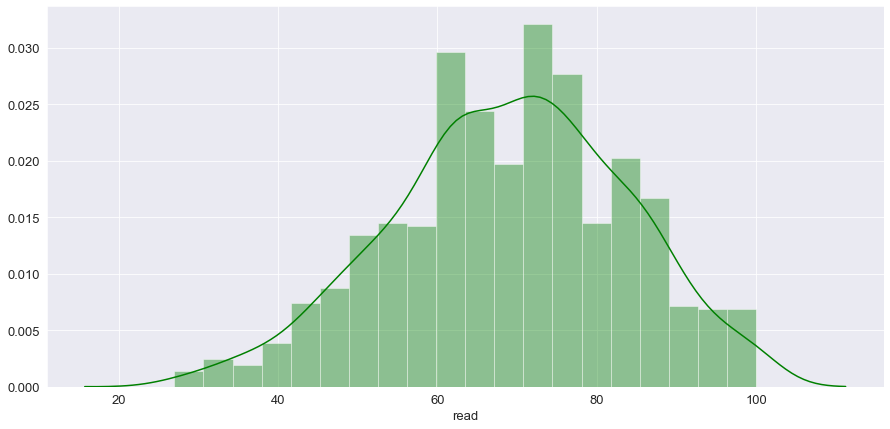

In [43]:
sns.distplot(data['read'],color='green')

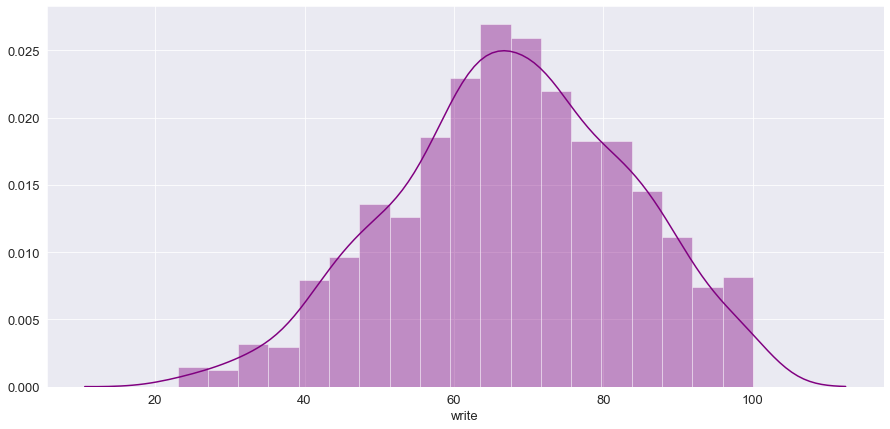

In [44]:
sns.distplot(data['write'],color='purple')

In [46]:
name=data.groups
math=data.maths
wr=data.write
read1=data.read

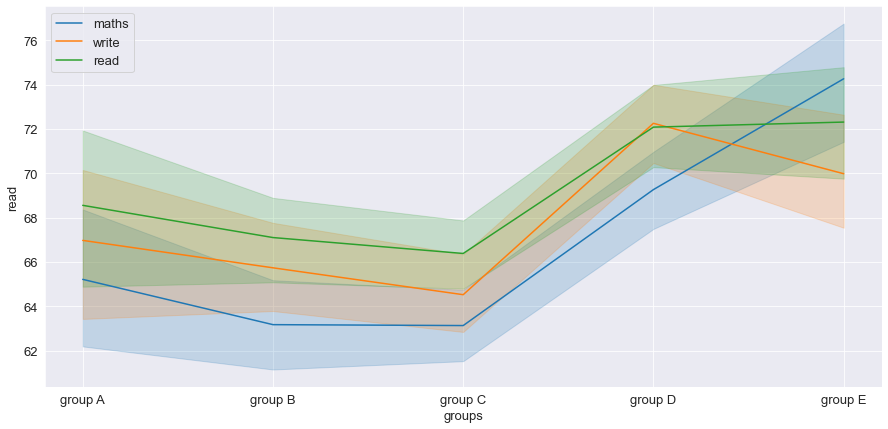

In [54]:
sns.lineplot(name,math)
sns.lineplot(name,wr)
sns.lineplot(name,read1)
plt.legend(['maths','write','read'],loc='upper left')